In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("DS_C12_S1_Regression_Insurance_Data_Project.csv")
df.head()# sclale the children col

,age,gender,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 8)

In [4]:
df.isnull().sum()

age         0
gender      0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df['classif'].fillna(st.mode(df['classif']),inplace=True)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1338 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


# Auto EDA with Klib liabrary

In [8]:
! pip install klib

In [9]:
import klib


In [10]:
df=klib.data_cleaning(df)

Shape of cleaned data: (1337, 8) - Remaining NAs: 0


Dropped rows: 1
     of which 1 duplicates. (Rows (first 150 shown): [581])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.06 MB (-75.0%)



In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int16   
 1   gender    1337 non-null   category
 2   bmi       1337 non-null   float32 
 3   classif   1337 non-null   category
 4   children  1337 non-null   int8    
 5   smoker    1337 non-null   category
 6   region    1337 non-null   category
 7   charges   1337 non-null   float32 
dtypes: category(4), float32(2), int16(1), int8(1)
memory usage: 20.4 KB


# EDA with Swtviz

In [12]:
! pip install sweetviz

In [13]:
import sweetviz as sv#

In [14]:
my_sv = sv.analyze(df)
my_sv.show_html('my_sv.html')

                                             |                                             | [  0%]   00:00 ->…

Report my_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Special character

In [15]:
for i in df.columns:
    if(' ?' in df[i].value_counts().index):
        df[i] = df[i].replace(' ?',np.nan,regex=False)
df.isnull().sum()

age         0
gender      0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

age
gender
bmi
classif
children
smoker
region
charges
Enter the columns name -->  age


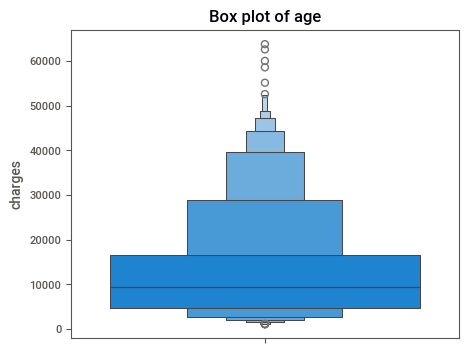

In [16]:
# Finding the outliers
for i in df.columns:
        print(i)
my_column = input("Enter the columns name -->  ")
if my_column in df.columns:
    plt.figure(figsize=(5,4))
    sns.boxenplot(df[i])
    plt.title(f'Box plot of {my_column}')
    plt.show()
else:
    print('wrong column')

In [17]:
df['gender']

0       female
1         male
2         male
3         male
4         male
         ...  
1332      male
1333    female
1334    female
1335    female
1336    female
Name: gender, Length: 1337, dtype: category
Categories (2, object): ['female', 'male']

In [18]:
df

,age,gender,bmi,classif,children,smoker,region,charges
0,19,female,27.900000,PREO,0,yes,southwest,16884.923828
1,18,male,33.770000,OB1,1,no,southeast,1725.552246
2,28,male,33.000000,OB1,3,no,southeast,4449.461914
3,0,male,22.705000,N,0,no,northwest,21984.470703
4,32,male,28.879999,PREO,0,no,northwest,3866.855225
...,...,...,...,...,...,...,...,...
1332,50,male,30.969999,OB1,3,no,northwest,10600.547852
1333,18,female,31.920000,OB1,0,no,northeast,2205.980713
1334,18,female,36.849998,OB2,0,no,southeast,1629.833496
1335,21,female,25.799999,PREO,0,no,southwest,2007.944946


In [19]:
df[df['age']==-1]

,age,gender,bmi,classif,children,smoker,region,charges
1336,-1,female,29.07,PREO,0,yes,northwest,29141.359375


In [20]:
df['age'] = df['age'].replace(-1,df['age'].median())

In [21]:
new_df = pd.DataFrame()
new_df.index = ['count','minimum','maximum','myrange','Q1','Q3','IQR','UpperFence','LowerFence']

In [22]:
def finding_ol(i,c):
    val = df.loc[:,c]
    count = len(val)
    minimum = val.min()
    maximum = val.max()
    myrange = maximum - minimum
    
    Q1 = val.quantile(0.25)
    Q3 = val.quantile(0.75)
    IQR = Q3 - Q1
    UpperFence = Q3 + (1.5*IQR)
    LowerFence = Q1 - (1.5*IQR)
    
    new_df.insert(i,column=c,value=[count,minimum,maximum,myrange,Q1,Q3,IQR,UpperFence,LowerFence])

In [23]:
j = {0:'age',1:'bmi',2:'charges'}

In [24]:
for i,c in j.items():
    finding_ol(i,c)

In [25]:
new_df

,age,bmi,charges
count,1337.0,1337.000000,1337.000000
minimum,-58.0,15.960000,1121.873901
maximum,190.0,53.130001,63770.429688
myrange,248.0,37.170001,62648.555786
Q1,26.0,26.290001,4746.344238
Q3,51.0,34.700001,16657.716797
IQR,25.0,8.410000,11911.372559
UpperFence,88.5,47.315001,34524.775635
LowerFence,-11.5,13.675001,-13120.714600


In [26]:
df[df['age']>-11.5]

,age,gender,bmi,classif,children,smoker,region,charges
0,19,female,27.900000,PREO,0,yes,southwest,16884.923828
1,18,male,33.770000,OB1,1,no,southeast,1725.552246
2,28,male,33.000000,OB1,3,no,southeast,4449.461914
3,0,male,22.705000,N,0,no,northwest,21984.470703
4,32,male,28.879999,PREO,0,no,northwest,3866.855225
...,...,...,...,...,...,...,...,...
1332,50,male,30.969999,OB1,3,no,northwest,10600.547852
1333,18,female,31.920000,OB1,0,no,northeast,2205.980713
1334,18,female,36.849998,OB2,0,no,southeast,1629.833496
1335,21,female,25.799999,PREO,0,no,southwest,2007.944946


In [27]:
treat_lf = pd.DataFrame(np.arange(1337))

In [28]:
for i,c in j.items():
    dummy_df = df.loc[:,c]
    LF = new_df.loc["LowerFence",c]
    r=dummy_df.drop(np.where(dummy_df<LF)[0]).reset_index(drop=True)
    treat_lf.insert(i,column=c,value=r)   

In [29]:
treated_uf_lf = pd.DataFrame(np.arange(1337))

In [30]:
for i,c in j.items():
    dummy_df = treat_lf.loc[:,c]
    UF = new_df.loc["UpperFence",c]
    r = dummy_df.drop(np.where(dummy_df>UF)[0]).reset_index(drop=True)
    treated_uf_lf.insert(i,column=c,value=r)

In [31]:
for i,c in j.items():
    df[c] = treated_uf_lf[c].fillna(treated_uf_lf[c].median())

In [32]:
df['charges'].min()

1121.8739013671875

In [33]:
# EDA


In [34]:
categorical = df.select_dtypes(include='category')
numerical = df.select_dtypes(exclude='category')

In [35]:
categorical

,gender,classif,smoker,region
0,female,PREO,yes,southwest
1,male,OB1,no,southeast
2,male,OB1,no,southeast
3,male,N,no,northwest
4,male,PREO,no,northwest
...,...,...,...,...
1332,male,OB1,no,northwest
1333,female,OB1,no,northeast
1334,female,OB2,no,southeast
1335,female,PREO,no,southwest


In [36]:
numerical

,age,bmi,children,charges
0,19.0,27.900000,0,16884.923828
1,18.0,33.770000,1,1725.552246
2,28.0,33.000000,3,4449.461914
3,0.0,22.705000,0,21984.470703
4,32.0,28.879999,0,3866.855225
...,...,...,...,...
1332,18.0,30.299999,3,8411.754883
1333,21.0,30.299999,0,8411.754883
1334,39.0,30.299999,0,8411.754883
1335,39.0,30.299999,0,8411.754883


In [37]:
def charge(x):
    if x>=1121 and x<=15000:
        return '11k to 15k'
    if x>15000 and x<=20000:
        return '15k to 20k'
    if x>20000 and x<=25000:
        return '20k to 25k'
    if x>25000 and x<=30000:
        return '25k to 30k'
    if x>30000 and x<35000:
        return '30k to 35k'
df['charges_cat'] = df['charges'].apply(charge)

In [38]:
def age(x):
    if x>=0 and x<=10:
        return 'below 10'
    if x>10 and x<=20:
        return '10 to 20'
    if x>20 and x<=30:
        return '20 to 30'
    if x>30 and x<=40:
        return '30 to 40'
    if x>40 and x<=50:
        return '40 to 50'
    if x>50 and x<=60:
        return '50 to 60'
    if x>60:
        return 'Above 60'
df['age_cat'] = df['age'].apply(age)

In [39]:
df

,age,gender,bmi,classif,children,smoker,region,charges,charges_cat,age_cat
0,19.0,female,27.900000,PREO,0,yes,southwest,16884.923828,15k to 20k,10 to 20
1,18.0,male,33.770000,OB1,1,no,southeast,1725.552246,11k to 15k,10 to 20
2,28.0,male,33.000000,OB1,3,no,southeast,4449.461914,11k to 15k,20 to 30
3,0.0,male,22.705000,N,0,no,northwest,21984.470703,20k to 25k,below 10
4,32.0,male,28.879999,PREO,0,no,northwest,3866.855225,11k to 15k,30 to 40
...,...,...,...,...,...,...,...,...,...,...
1332,18.0,male,30.299999,OB1,3,no,northwest,8411.754883,11k to 15k,10 to 20
1333,21.0,female,30.299999,OB1,0,no,northeast,8411.754883,11k to 15k,20 to 30
1334,39.0,female,30.299999,OB2,0,no,southeast,8411.754883,11k to 15k,30 to 40
1335,39.0,female,30.299999,PREO,0,no,southwest,8411.754883,11k to 15k,30 to 40


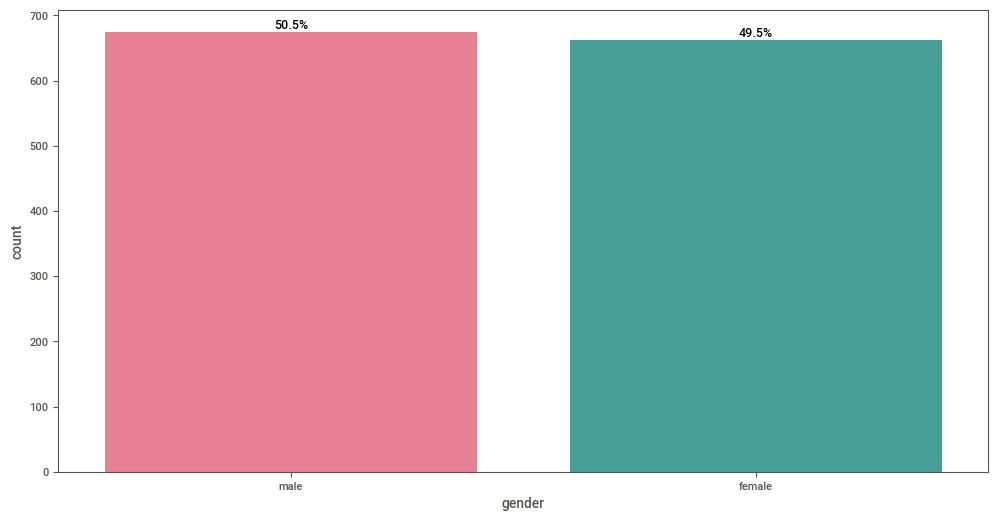

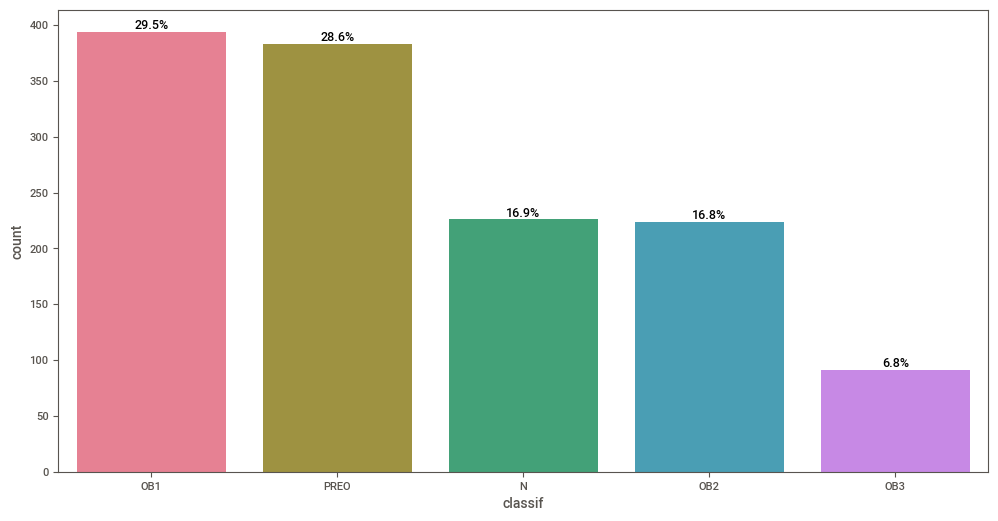

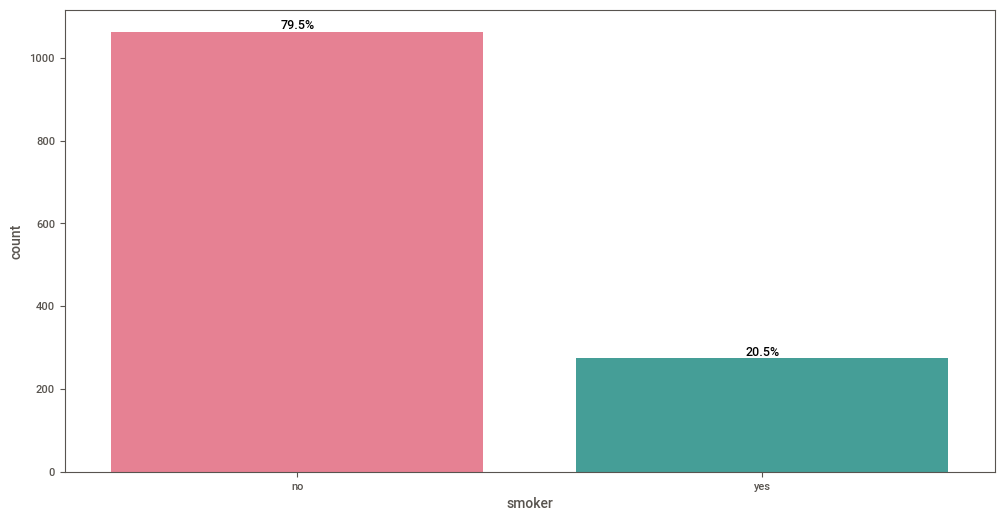

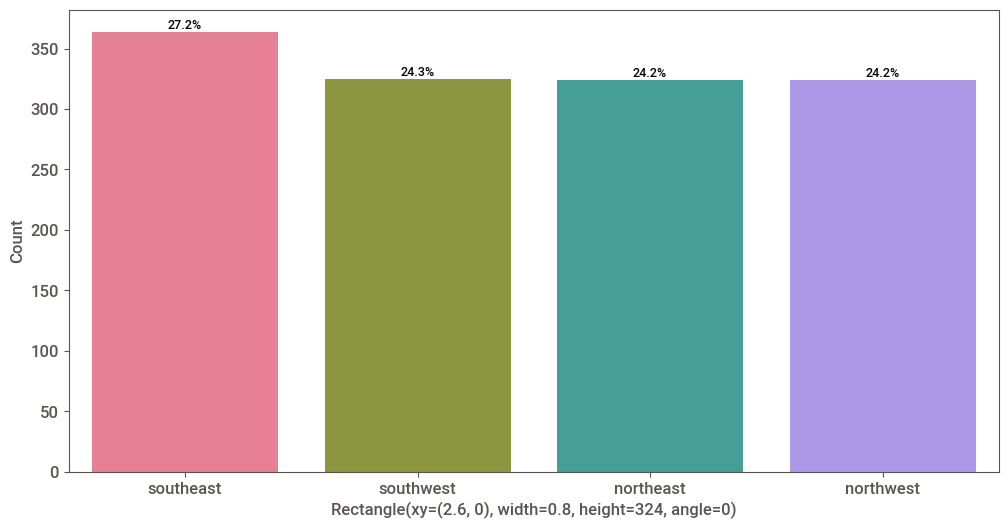

In [40]:
for i in categorical.columns:
    plt.figure(figsize=(12,6))
    desc = df[i].value_counts().index[:5]
    ax=sns.countplot(x=categorical[i], palette='husl',order=desc)
    
    for i in ax.patches:
        percentage = f'{round(i.get_height()/len(df)*100, 1)}%'
        x = i.get_x() + i.get_width() / 2
        y = i.get_height()
        ax.annotate(percentage, (x, y), va='bottom', ha='center', size=9)
plt.xlabel(i,size=12)

plt.ylabel('Count',size=12)
plt.xticks(rotation=0,size=12) 
plt.yticks(size=12)
plt.show()

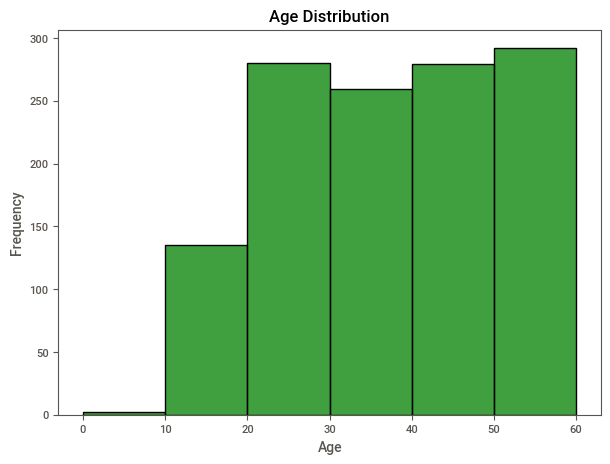

In [41]:
plt.figure(figsize=(7,5))
my_bins = range(0, 70, 10)
sns.histplot(df['age'], bins=my_bins, edgecolor='black',color='green')  # Adjust the range based on your data
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.xticks(range(0, 70, 10)) 

plt.show()

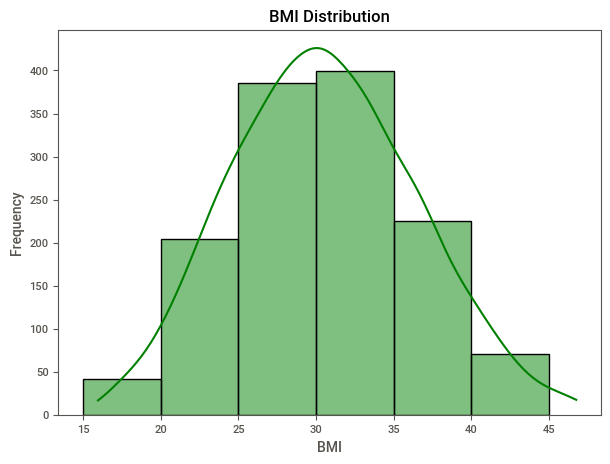

In [42]:
plt.figure(figsize=(7,5))
my_bins = range(15, 50, 5)
sns.histplot(df['bmi'], bins=my_bins, edgecolor='black',color='green',kde=True)  # Adjust the range based on your data
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.xticks(range(15, 50,5 )) 
plt.show()

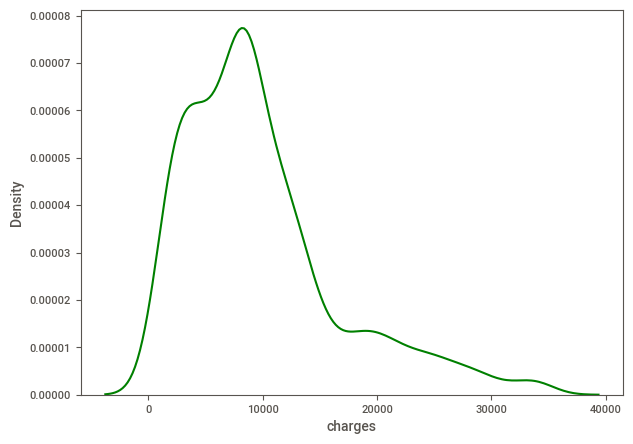

In [43]:
plt.figure(figsize=(7,5))
sns.kdeplot(df['charges'],color="green");

## 

In [44]:
# gender wise changers category

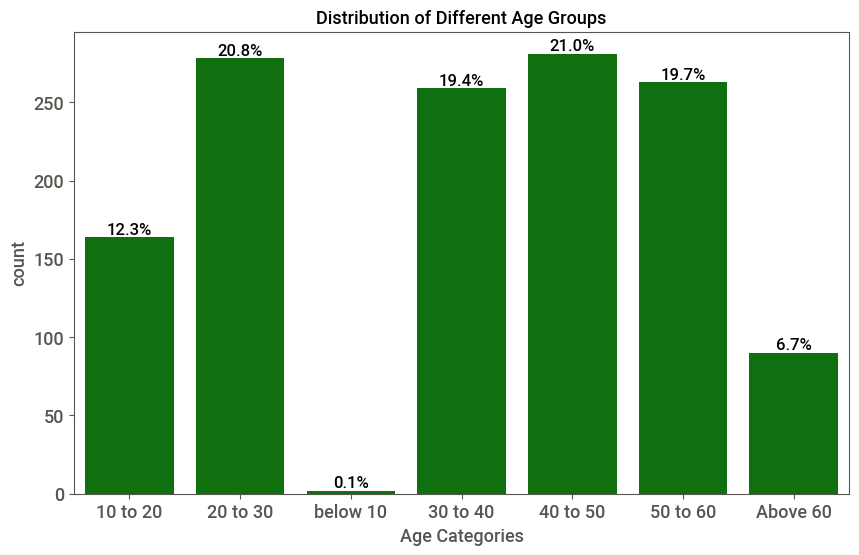

In [45]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=df['age_cat'],color='green')
total = len(df['age'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=12)

plt.xlabel('Age Categories', size=13)
plt.ylabel('count', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Distribution of Different Age Groups', size=13)
plt.show()

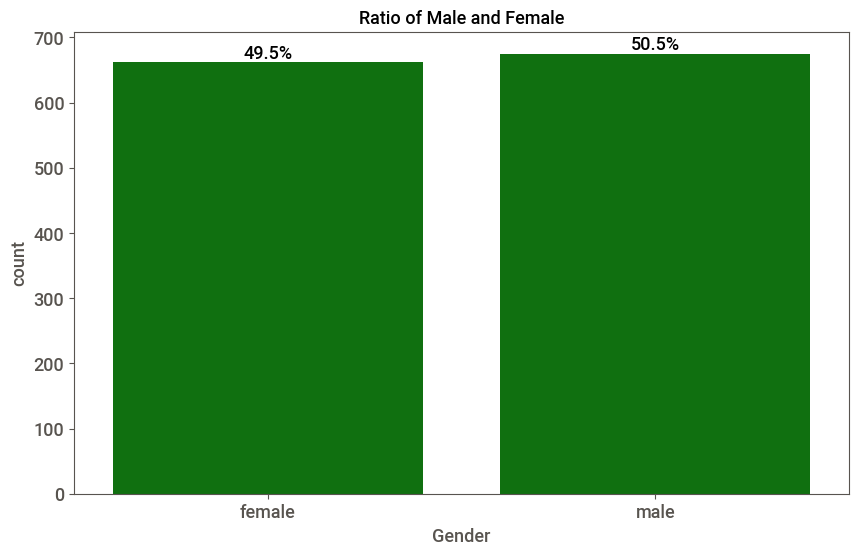

In [46]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=df['gender'],color='green')
total = len(df['gender'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=13)

plt.xlabel('Gender', size=13)
plt.ylabel('count', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Ratio of Male and Female', size=13)
plt.show()

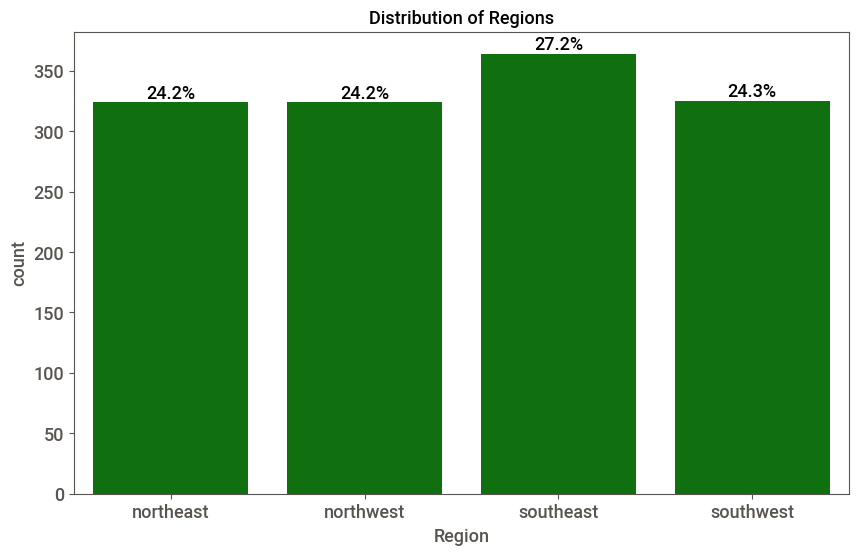

In [47]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=df['region'],color='green')
total = len(df['region'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=13)

plt.xlabel('Region', size=13)
plt.ylabel('count', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Distribution of Regions', size=13)
plt.show()

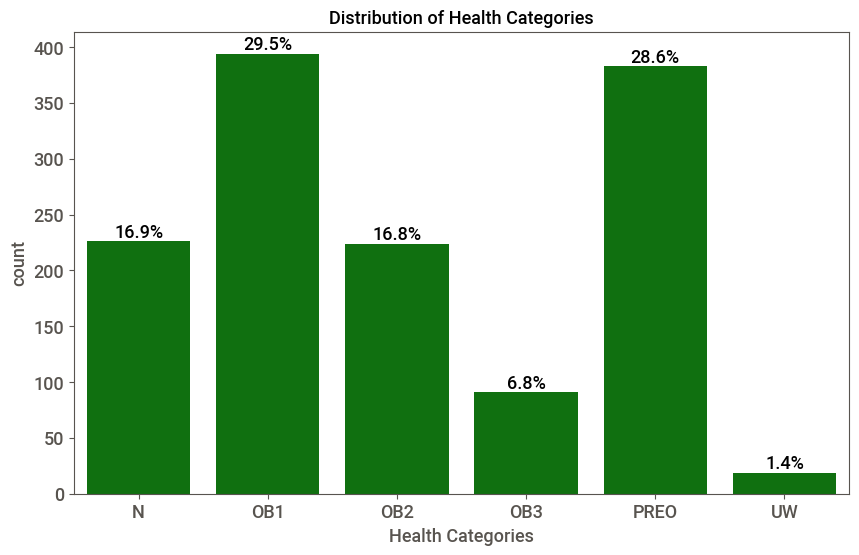

In [48]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=df['classif'],color='green')
total=len(df['classif'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=13)

plt.xlabel('Health Categories', size=13)
plt.ylabel('count', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Distribution of Health Categories', size=13)
plt.show()


In [49]:
df.bmi.describe()

count    1337.000000
mean       30.535715
std         5.902224
min        15.960000
25%        26.290001
50%        30.299999
75%        34.430000
max        46.750000
Name: bmi, dtype: float64

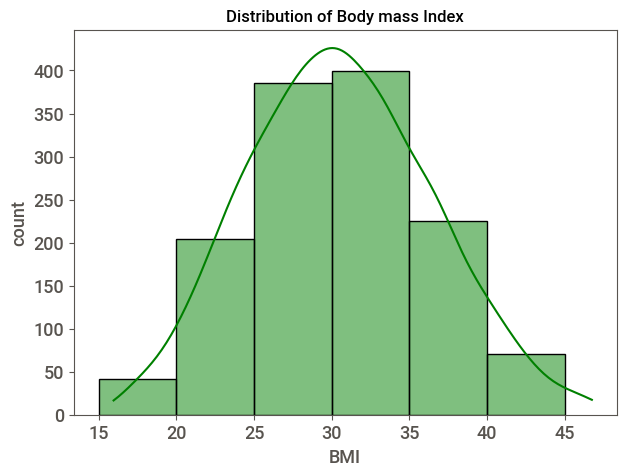

In [50]:
plt.figure(figsize=(7,5))
my_bins = range(15,50,5)
sns.histplot(x=df['bmi'],bins=my_bins,edgecolor='black',color='green',kde=True)
plt.title('Distribution of Body mass Index')
plt.xlabel('BMI',size=13)
plt.ylabel('count',size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

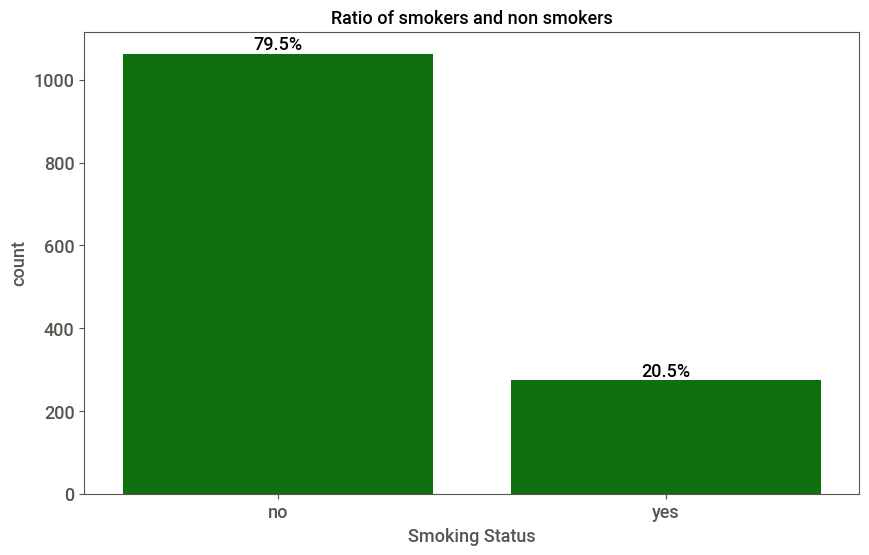

In [51]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=df['smoker'],color='green')
total = len(df['smoker'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=13)

plt.xlabel('Smoking Status', size=13)
plt.ylabel('count', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Ratio of smokers and non smokers', size=13)
plt.show()

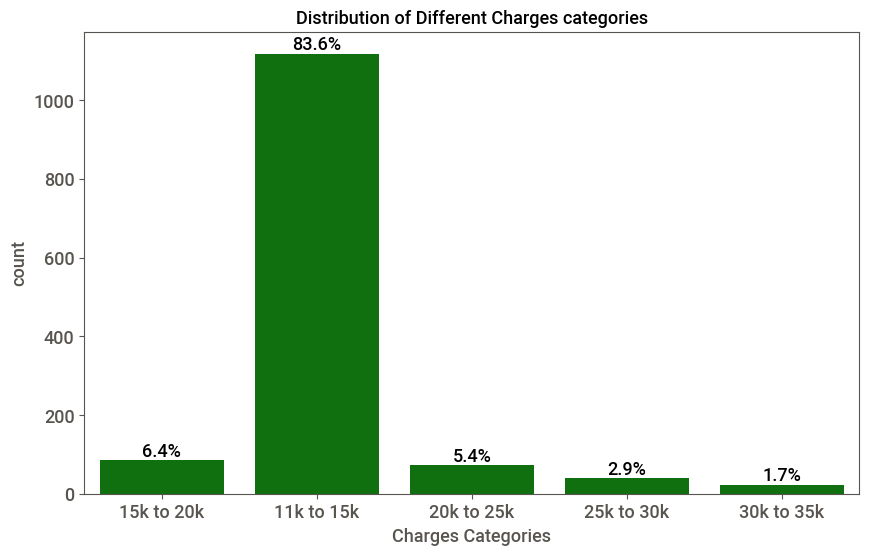

In [52]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x=df['charges_cat'],color='green')
total = len(df['charges_cat'])
for i in ax.patches:
    percentage = f'{round(i.get_height() / total * 100, 1)}%'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), va='bottom', ha='center', size=13)

plt.xlabel('Charges Categories', size=13)
plt.ylabel('count', size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Distribution of Different Charges categories', size=13)
plt.show()

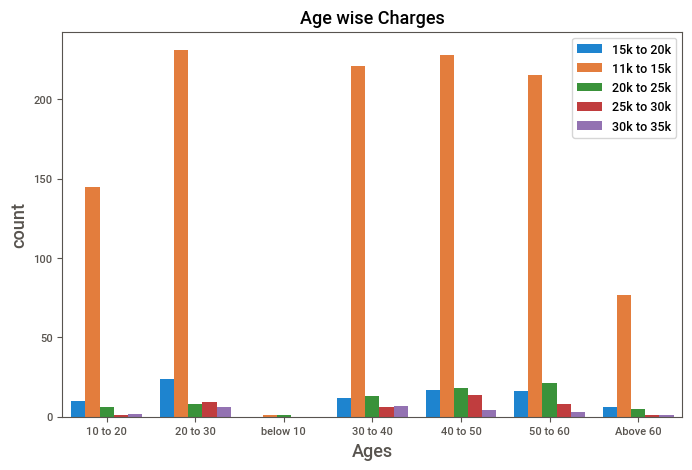

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['age_cat'],hue=df['charges_cat'])
plt.title('Age wise Charges',size=13)
plt.xlabel('Ages',size=13)
plt.ylabel('count',size=13)
plt.legend(loc='upper right',fontsize=9)
plt.show()

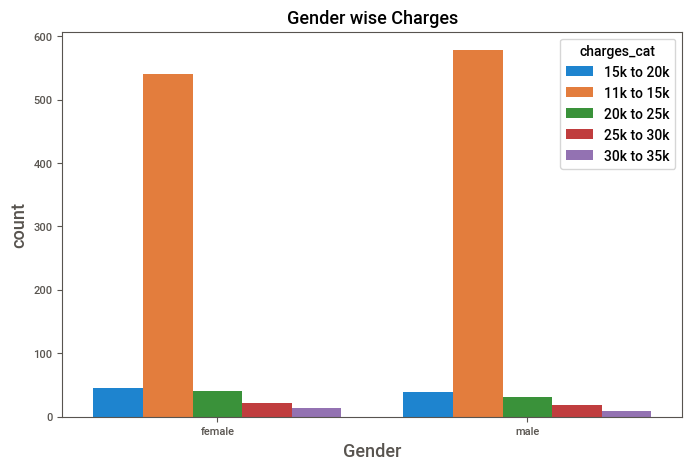

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['gender'],hue=df['charges_cat'])
plt.title('Gender wise Charges',size=13)
plt.xlabel('Gender',size=13)
plt.ylabel('count',size=13)
plt.show()

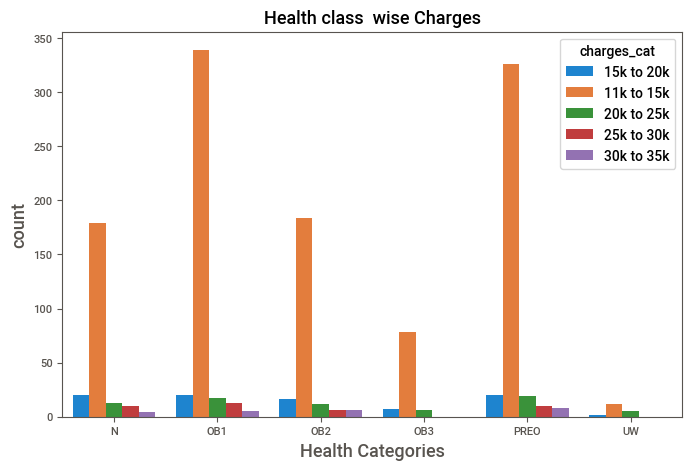

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['classif'],hue=df['charges_cat'])
plt.title('Health class  wise Charges',size=13)
plt.xlabel('Health Categories',size=13)
plt.ylabel('count',size=13)
plt.show()

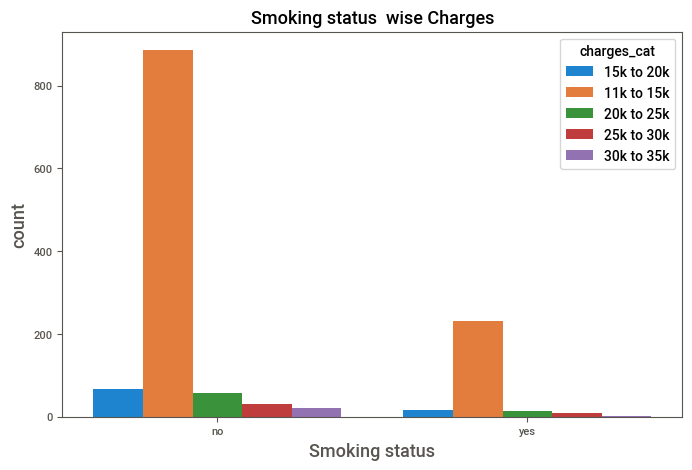

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['smoker'],hue=df['charges_cat'])
plt.title('Smoking status  wise Charges',size=13)
plt.xlabel('Smoking status',size=13)
plt.ylabel('count',size=13)
plt.show()

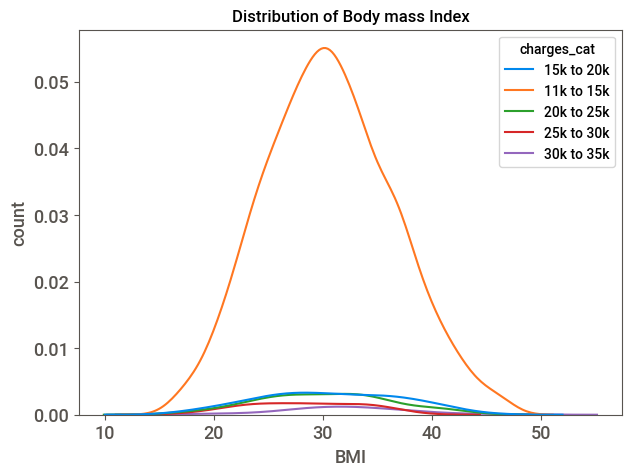

In [57]:
plt.figure(figsize=(7,5))
my_bins = range(15,50,5)
sns.kdeplot(x=df['bmi'],hue=df['charges_cat'])
plt.title('Distribution of Body mass Index')
plt.xlabel('BMI',size=13)
plt.ylabel('count',size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

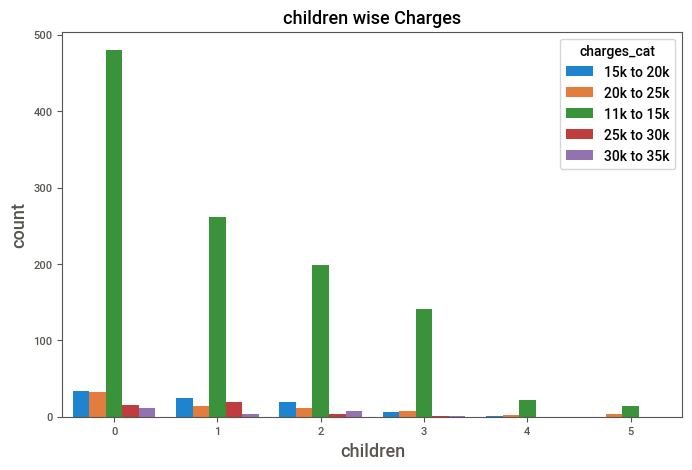

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['children'],hue=df['charges_cat'])
plt.title('children wise Charges',size=13)
plt.xlabel('children',size=13)
plt.ylabel('count',size=13)
plt.show()

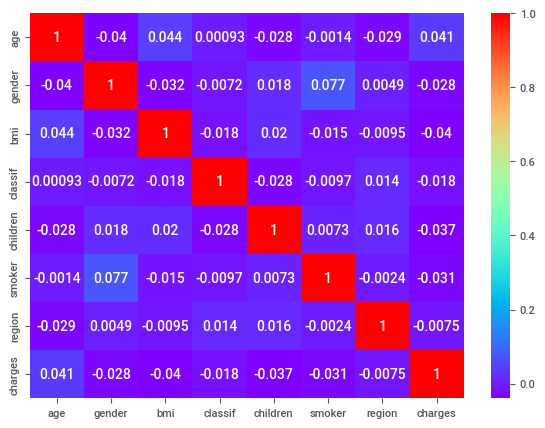

In [92]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='rainbow',annot=True);

### Machine Learning

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

In [61]:
df.drop(columns=['charges_cat','age_cat'],inplace=True)

In [62]:
df.columns

Index(['age', 'gender', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [63]:
scaling_data = ['age','bmi','children']

In [64]:
encoding_data  = ['gender', 'classif', 'smoker', 'region']

In [65]:
mysclaler = StandardScaler()
myencoder = LabelEncoder()

In [66]:
for i in scaling_data:
    df[i] = mysclaler.fit_transform(df[i].to_numpy().reshape(-1,1))
for i in encoding_data:
    df[i] = myencoder.fit_transform(df[i])

In [67]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
y

0       16884.923828
1        1725.552246
2        4449.461914
3       21984.470703
4        3866.855225
            ...     
1332     8411.754883
1333     8411.754883
1334     8411.754883
1335     8411.754883
1336     8411.754883
Name: charges, Length: 1337, dtype: float32

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [69]:
lin_reg = LinearRegression()

In [70]:
df

,age,gender,bmi,classif,children,smoker,region,charges
0,-1.430547,0,-0.446729,4,-0.909234,1,3,16884.923828
1,-1.501582,1,0.548183,1,-0.079442,0,2,1725.552246
2,-0.791224,1,0.417675,1,1.580143,0,2,4449.461914
3,-2.780228,1,-1.327235,0,-0.909234,0,1,21984.470703
4,-0.507080,1,-0.280628,4,-0.909234,0,1,3866.855225
...,...,...,...,...,...,...,...,...
1332,-1.501582,1,-0.039951,1,1.580143,0,1,8411.754883
1333,-1.288475,0,-0.039951,1,-0.909234,0,0,8411.754883
1334,-0.009829,0,-0.039951,2,-0.909234,0,2,8411.754883
1335,-0.009829,0,-0.039951,4,-0.909234,0,3,8411.754883


##### Linear Regression

In [71]:
# Model Building
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [72]:
train=lin_reg.score(x_train,y_train)*100

In [73]:
y_pred = lin_reg.predict(x_test)

In [74]:
mae = (mean_absolute_error(y_test,y_pred))
mae

5436.854537650047

In [75]:
print('lin_training-->',train*100)
print('lin_testing-->',mae)

lin_training--> 94.31385173327533
lin_testing--> 5436.854537650047


##### Random Forest

In [76]:
my_rf = RandomForestRegressor(n_estimators=100,random_state=42)
my_rf

RandomForestRegressor(random_state=42)

In [77]:
my_rf.fit(x_train,y_train)
rf_train_per =   my_rf.score(x_train,y_train)
y_pred_rf = my_rf.predict(x_test)
print('RF_TRAINING-->',rf_train_per*100)
print('RF_TESTING-->',mean_absolute_error(y_test,y_pred))

RF_TRAINING--> 84.3348982928041
RF_TESTING--> 5436.854537650047


In [78]:
my_rf.feature_importances_

array([0.25969726, 0.0462092 , 0.38909836, 0.1004545 , 0.0850583 ,
       0.02707462, 0.09240775])

In [79]:
df.head()

,age,gender,bmi,classif,children,smoker,region,charges
0,-1.430547,0,-0.446729,4,-0.909234,1,3,16884.923828
1,-1.501582,1,0.548183,1,-0.079442,0,2,1725.552246
2,-0.791224,1,0.417675,1,1.580143,0,2,4449.461914
3,-2.780228,1,-1.327235,0,-0.909234,0,1,21984.470703
4,-0.507080,1,-0.280628,4,-0.909234,0,1,3866.855225


In [80]:
# imp_features age , bmi , classif
x2 = df.loc[:,['age','bmi','classif']]

In [81]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y,train_size=0.8,random_state=42)

In [82]:
my_rf.fit(x2_train,y2_train)
rf_train2=my_rf.score(x2_train,y2_train)
y_pred_rf2 = my_rf.predict(x2_test)
print('RF_TRAIN WITH FEATURE SELECTION--> ',rf_train2*100)
print('TESTING_PERFORMANCE WITH FEATURE SELECTION',mean_absolute_error(y2_test,y_pred_rf2))

RF_TRAIN WITH FEATURE SELECTION-->  83.12065034016456
TESTING_PERFORMANCE WITH FEATURE SELECTION 5838.312091694814


#### with feature selection it's giving more bad performance

##### HyperParameter tuning

In [83]:
my_hyper_param = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

my_rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=my_rf, param_grid=my_hyper_param, cv=4, scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train)


GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_absolute_error')

In [84]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 50}

In [85]:
my_hyp_rf = RandomForestRegressor(n_estimators=50,max_depth=10,min_samples_leaf=4,min_samples_split=10)

In [86]:
my_hyp_rf.fit(x_train,y_train)
rf_train3=my_hyp_rf.score(x_train,y_train)
y_pred_rf3 = my_hyp_rf.predict(x_test)
print('TRAINING PERFORMANCE WITH HYPERPARAMETER--> ',rf_train3*100)
print('TESTING PERFORMANCE WITH HYPERPARAMETER--> ',mean_absolute_error(y_test,y_pred_rf3))

TRAINING PERFORMANCE WITH HYPERPARAMETER-->  35.235447495743585
TESTING PERFORMANCE WITH HYPERPARAMETER-->  5528.97471357821


In [87]:
k_fold = 4
my_rf_cv = cross_val_score(my_hyp_rf, x, y, cv=k_fold, scoring='neg_mean_absolute_error')
print('RF_CV-->',my_rf_cv.mean())

RF_CV--> -5302.887860892055


##### Adaboost Regressor

### Prediction

In [91]:
my_array = np.array([[]])
print('_'*110)
for A in range(0,61):
    A = int(input('Enter Age Between 0-60--> '))
    if A>0 and A<=60:
        my_array=np.concatenate((my_array,np.array([[A]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
        
print('_'*110)
for G in range(0,2):
    G=int(input('Enter Gender if Female(0)/if Male(1)--> '))
    if G>=0 and G<=2:
        my_array=np.concatenate((my_array,np.array([[G]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
print('_'*110)
for B in range(10,51):
    B = int(input('Enter BMI Range between 10-50--> '))
    if B>=10 and B<=50:
        my_array=np.concatenate((my_array,np.array([[B]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
print('_'*110)        
for C in range(0,6):
    C = int(input('Enter Health status based on bmi if health status is OB1(0) / if OB2(1) / OB3(2) /if PREFO(3) / if UW(5)--> '))
    if C>=0 and C<=6:
        my_array=np.concatenate((my_array,np.array([[C]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
print('_'*110)
for Chil in range(0,6):
    Chil = int(input('Enter Children Between 0-5--> '))
    if Chil>=0 and Chil<=5:
        my_array=np.concatenate((my_array,np.array([[Chil]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
print('_'*110)
for S in range(0,2):
    S=int(input('Enter  Smoking Status if yes (1) / if No (0)--> '))
    if S>=0 and S<=1:
        my_array=np.concatenate((my_array,np.array([[S]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
for R in (0,4):
    R=int(input('Enter Regiosn if Northeast(0) / if Northwest(1) / if Southeast(2) / if Southwest(3)--> '))
    if R>=0 and R<=3:
        my_array=np.concatenate((my_array,np.array([[A]])),axis=1) 
        break
    else:
        print('Entered Wrong input')
print('-'*110)
print('-'*110)

pred_cost = my_hyp_rf.predict(my_array)[0]
print('Your Predicted Insurance Cost is -->',round(pred_cost))
# WHY ONLY RF_HYPER IS PREDICTING WHY NOT JUST RF

______________________________________________________________________________________________________________
Enter Age Between 0-60--> 60
______________________________________________________________________________________________________________
Enter Gender if Female(0)/if Male(1)--> 1
______________________________________________________________________________________________________________
Enter BMI Range between 10-50--> 1
Entered Wrong input
Enter BMI Range between 10-50--> 10
______________________________________________________________________________________________________________
Enter Health status based on bmi if health status is OB1(0) / if OB2(1) / OB3(2) /if PREFO(3) / if UW(5)--> 1
______________________________________________________________________________________________________________
Enter Children Between 0-5--> 1
______________________________________________________________________________________________________________
Enter  Smoking Status if yes (